In [3]:
import pandas as pd
import numpy as np
import copy, time
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [35]:
data_path = 'data/'
X_train = pd.read_csv(data_path + 'train.csv',header=None)
y_train = pd.read_csv(data_path + 'trainLabels.csv',header=None)
X_test = pd.read_csv(data_path + 'test.csv',header=None)

In [36]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [37]:
from sklearn.preprocessing import Imputer    
imputer = Imputer(missing_values='NaN', strategy='mean', axis = 0)  
imputer = imputer.fit(X_train)        
X_train = imputer.transform(X_train)

from sklearn.preprocessing import StandardScaler
sc_X  = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [38]:
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=20,
                                  max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True)

In [50]:
lr.fit(X_train, y_train)
lr_pred = lr.predict_proba(X_test)[:,1]
print(lr.score(X_train,y_train))

Id = np.arange(1,X_test.shape[0]+1)
sub = pd.DataFrame({'Id': Id, 'Solution': lr_pred})
sub['Solution'] = sub['Solution'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('lr_048.csv', index=False) 

0.838


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
gdbt.fit(X_train, y_train)
gdbt_pred = gdbt.predict_proba(X_test)[:,1]
print(gdbt.score(X_train,y_train))

Id = np.arange(1,X_test.shape[0]+1)
sub = pd.DataFrame({'Id': Id, 'Solution': gdbt_pred})
sub['Solution'] = sub['Solution'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('gdbt_048.csv', index=False) 

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


In [45]:
rf.fit(X_train, y_train)
rf_pred = rf.predict_proba(X_test)[:,1]
print(rf.score(X_train,y_train))

Id = np.arange(1,X_test.shape[0]+1)
sub = pd.DataFrame({'Id': Id, 'Solution': rf_pred})
sub['Solution'] = sub['Solution'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('rf_048.csv', index=False) 

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


0.95


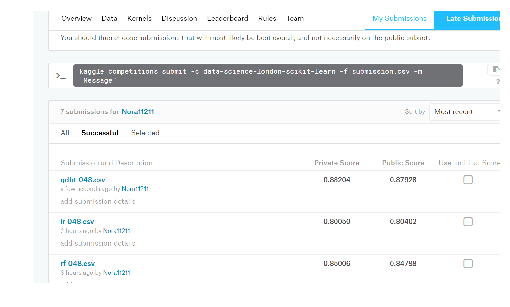

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imread(data_path +'048.png')
plt.figure(figsize=(10, 5))
plt.imshow(img)
plt.axis("off")
plt.show()